In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
athlets = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [25]:
region.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [37]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version")


In [5]:
athlets.shape

(271116, 15)

In [14]:
 athlets = athlets[athlets['Season'] == 'Summer']

In [16]:
athlets.shape

(222552, 15)

In [6]:
athlets = athlets.merge(region, on='NOC', how='left')

In [20]:
athlets['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [21]:
athlets.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [22]:
athlets.drop_duplicates(inplace = True)

In [23]:
athlets.duplicated().sum()

0

In [25]:
athlets['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [33]:
athlets = pd.concat([athlets, pd.get_dummies(athlets['Medal'])], axis=1)


In [27]:
athlets.shape

(221167, 17)

In [44]:
athlets.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


In [75]:
    athlets[(athlets['NOC'] == 'IND') & (athlets['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [55]:
Medal_tally = athlets.drop_duplicates(subset=['Team', 'NOC', 'Year', 'Games', 'City', 'Sport', 'Event', 'Medal'])

In [61]:
Medal_tally = Medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index().head(25)


In [81]:
top_10_countries = athlets.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Team
United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Name: count, dtype: int64

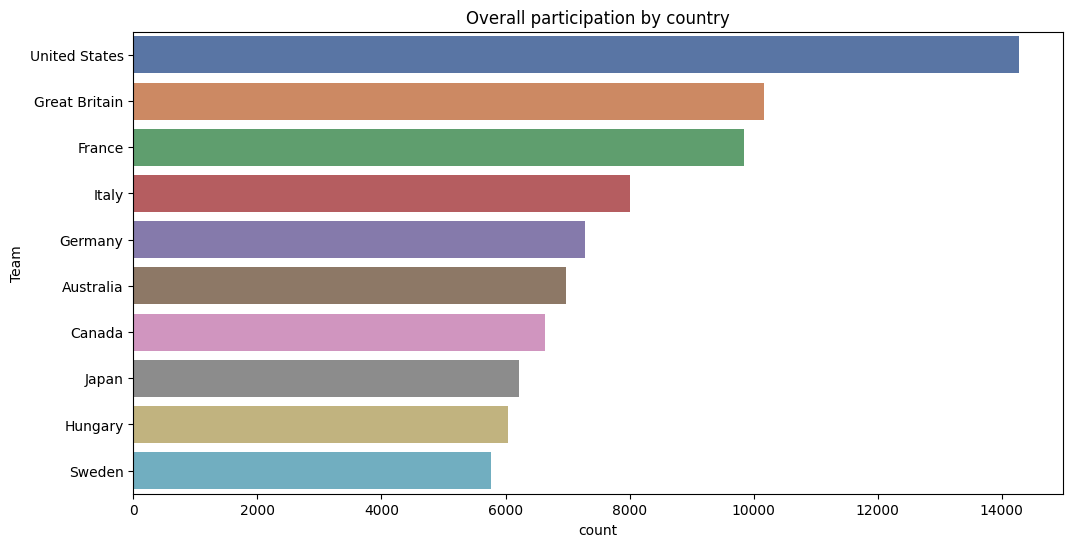

In [97]:
plt.figure(figsize=(12, 6))
plt.title('Overall participation by country')
sns.barplot(x=top_10_countries, y=top_10_countries.index, palette='deep', orient='h')
plt.show()



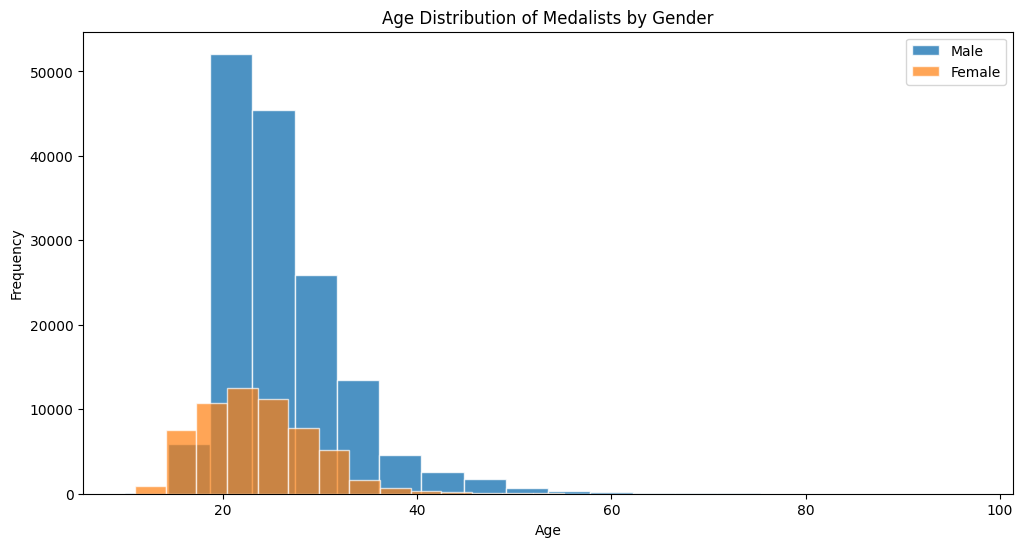

In [123]:

plt.figure(figsize=(12, 6))
plt.hist(athlets[athlets['Sex'] == 'M']['Age'], bins=20,  label='Male', alpha=0.8,edgecolor = 'white')
plt.hist(athlets[athlets['Sex'] == 'F']['Age'], bins=20,  label='Female', alpha=0.7,edgecolor = 'white')
plt.title('Age Distribution of Medalists by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [124]:
gender_count = athlets.Sex.value_counts()
gender_count

Sex
M    161868
F     59299
Name: count, dtype: int64

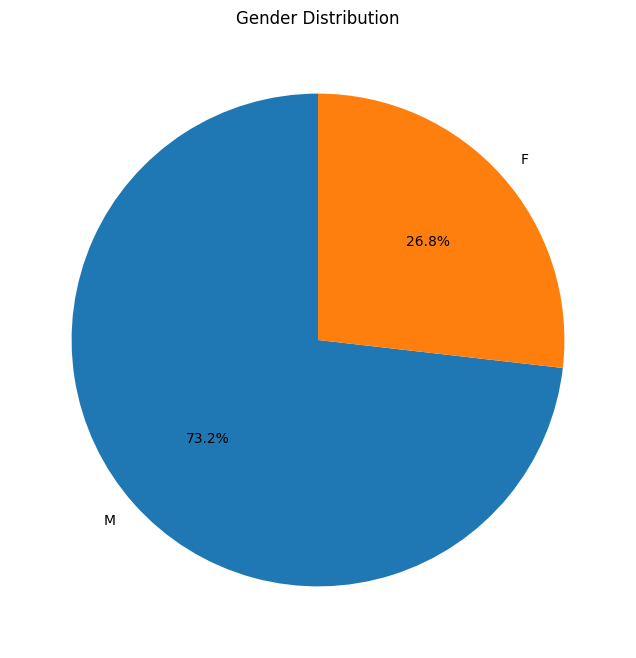

In [137]:
plt.figure(figsize=(8,8))
plt.title('Gender Distribution')
plt.pie(gender_count, labels = gender_count.index,autopct = '%1.1f%%', startangle = 90)
plt.show()

In [30]:
athlets_with_region = athlets.merge(region, on='NOC', how='left')


In [31]:
top_countries = athlets_with_region['region'].value_counts().head(5).index
medals_by_country = athlets_with_region.groupby(['Year','region'])['Medal'].count().reset_index()
medals_by_country = medals_by_country.query("region in @top_countries")

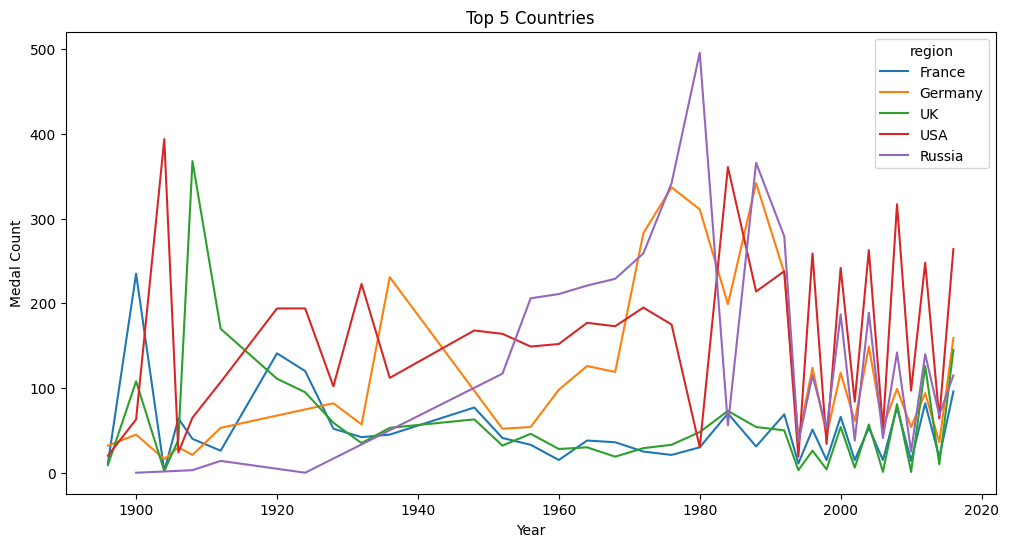

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data = medals_by_country, x = 'Year', y = 'Medal', hue = 'region')
plt.title('Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Medal Count')

plt.show()

In [42]:
not_null_medals = athlets_with_region[(athlets_with_region['Height'].notnull()) & (athlets_with_region['Weight'].notnull())]

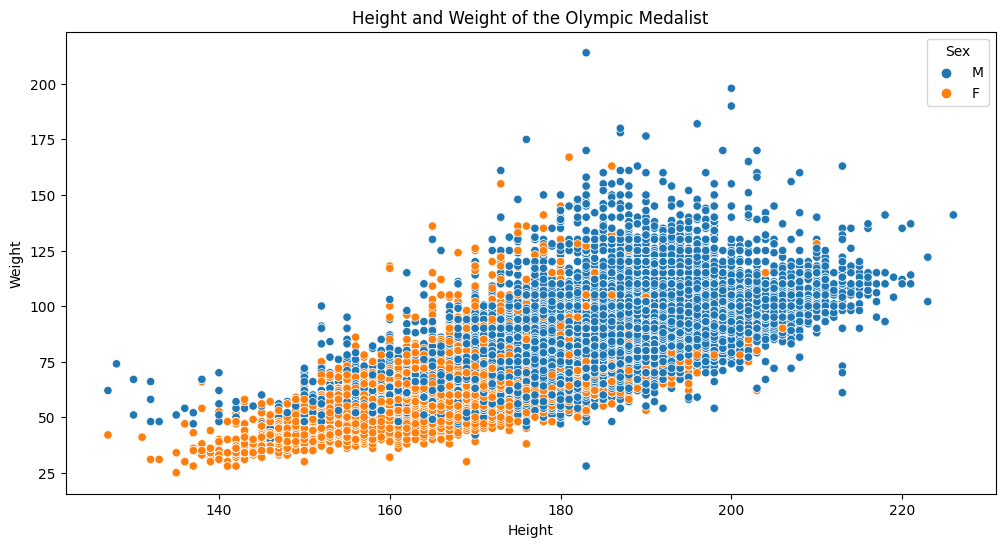

In [44]:
plt.figure(figsize = (12,6))
axis = sns.scatterplot(x = "Height", y = "Weight", data = not_null_medals,hue = "Sex")
plt.title('Height and Weight of the Olympic Medalist')
plt.show()